In [2]:
import reference_impl as ref
import utils
import matlab.engine
import dataset

cfg = utils.Config(
    num_rx_antennas=1,
    num_tx_antennas=32,
    num_subcarriers=80,
    train_test_split=0.8,
    data_root="../data/dataset1",
    reduce_pca_overhead=False,
    total_bits=512,
    results_save_path="../results"
    # duplicate_data=1,
    # data_snr=-1
)


dataset.combine_time_series_paths(
    "../data/dataset2",
    list(range(33)),
    2.5e9,
    "train_set.pickle"
)
dataset.combine_time_series_paths(
    "../data/dataset2",
    list(range(34, 40)),
    2.5e9,
    "test_set.pickle"
)

train_set = dataset.dataset_from_path("../data/dataset2/train_set.pickle", cfg)
test_set = dataset.dataset_from_path("../data/dataset2/test_set.pickle", cfg)
matlab = matlab.engine.start_matlab()
refModel = ref.FullReferenceModel(cfg, matlab)

Saving files to  ../data/dataset2/train_set.pickle
Number of samples (14320, 1, 32, 1, 80)
Saving files to  ../data/dataset2/test_set.pickle
Number of samples (2655, 1, 32, 1, 80)


In [3]:
refModel.fit(train_set)

Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500


  0%|          | 0/12 [00:00<?, ?it/s]

In [4]:
# Downlink
prediction_error, zdl_windows = refModel.process(test_set)

# Uplink
predicted_csis = refModel.decode(prediction_error, zdl_windows)

Assessing performance...
Plotting results...


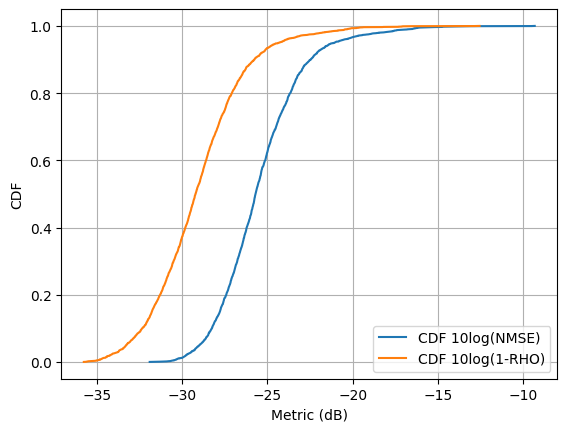

In [8]:
utils.reference_nmse_rho_test("reference", test_set.csi_samples, predicted_csis, save_path=cfg.results_save_path, btot=cfg.total_bits)